In [35]:
import pandas as pd
import unicodecsv
import matplotlib as plt
import numpy as np
import datetime
from pprint import pprint

In [50]:
transactions_file = '/Users/knico/new-git-project/transaction.csv'


In [51]:
df = pd.read_csv(transactions_file)
print(df.head())
    
    

    Order Sale_Date      Type  Store_ID  Transaction_ID  SKU  Quantity  \
0  133429  2/2/2021  Delivery      1666             866  1TS     230.0   
1  132970  2/3/2021  Delivery      4736             624  R6E     372.0   
2  132685  2/4/2021  Delivery      6459             482  IEV     298.0   
3  133327  2/5/2021  Delivery      3719             810  C8Z     466.0   
4  133115  2/6/2021  Delivery      1253             708  8HU     360.0   

   Sales_Amount  Inventory  
0         37.38        156  
1          2.06        253  
2          4.96         82  
3          8.88        453  
4          2.76          8  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133635 entries, 0 to 133634
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Sale_Date       133635 non-null  datetime64[ns]
 1   Type            133635 non-null  object        
 2   Store_ID        133635 non-null  |S21          
 3   Transaction_ID  133635 non-null  |S21          
 4   SKU             133635 non-null  object        
 5   Quantity        133635 non-null  float64       
 6   Sales_Amount    133635 non-null  float64       
 7   Inventory       133635 non-null  int64         
dtypes: bytes168(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 11.5+ MB


In [5]:
def drop_columns(col_name):
    if col_name in df:
        df.drop(labels=col_name,axis=1 , inplace = True)
    else: 
        print(col_name ,"does not exist")
    

In [6]:
drop_columns('Order')

In [7]:
# This function will convert the data types
def change_var_type(col_as_string, ctype):
    if ctype == 'string':
        new_type = df[col_as_string].astype("|S")
    if ctype == 'number':
        new_type = df[col_as_string].astype(int)
    #if ctype == 'date':
       # new_type = pd.to_datetime(df[col_as_string])
     #   new_type = df[col_as_string].astype(date)
    return new_type

In [8]:

df['Store_ID'] = change_var_type('Store_ID','string')
df['Transaction_ID']= change_var_type('Transaction_ID','string')
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

In [27]:
df.describe(include='all')

C:\Users\knico\AppData\Local\Temp/ipykernel_25080/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Sale_Date,Type,Store_ID,Transaction_ID,SKU,Quantity,Sales_Amount,Inventory
count,133635,133635,133635,133635,133635,133635.000000,133635.000000,133635.000000
unique,365,2,30,64682,187,NaN,NaN,NaN
top,2021-07-28 00:00:00,Sale,b'1253',b'772',N8U,NaN,NaN,NaN
freq,415,131706,13636,24,11088,NaN,NaN,NaN
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.178220,11.947653,2.796805
std,NaN,NaN,NaN,NaN,NaN,49.274735,19.306320,28.038712
min,NaN,NaN,NaN,NaN,NaN,0.010000,0.020000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,4.230000,0.000000


In [28]:
#Add up the Sales by Location
data = df.groupby(['Store_ID']).sum()['Sales_Amount']
print(data)

Store_ID
b'1253'    162224.19
b'1666'     65985.15
b'2065'     32484.37
b'2116'     61614.45
b'2547'     32720.51
b'3071'     66979.57
b'3624'     32470.94
b'3686'     31406.65
b'3719'     32253.04
b'3874'     63209.39
b'4736'     99475.75
b'4776'     33977.25
b'4921'     31312.84
b'5010'     34017.36
b'5058'     31949.58
b'5541'     63695.54
b'5599'     65516.98
b'5780'     32727.94
b'592'      65745.46
b'6044'     65677.75
b'6294'     98304.06
b'6450'     32469.71
b'6459'     65061.79
b'6865'     31828.48
b'7548'     65768.94
b'822'      34053.33
b'8303'     33195.44
b'8566'     31618.03
b'9200'     34124.90
b'9223'     64755.21
Name: Sales_Amount, dtype: float64


In [29]:
# View the sales and deliveries by date
date_volume = df.groupby(['Sale_Date','Type']).sum()['Quantity']
print(date_volume)


Sale_Date   Type    
2021-01-01  Delivery    2358.00
            Sale         580.00
2021-01-02  Delivery    3382.00
            Sale         505.67
2021-01-03  Delivery    2092.00
                         ...   
2021-12-28  Sale         501.00
2021-12-29  Sale         437.80
2021-12-30  Sale         526.00
2021-12-31  Delivery     289.00
            Sale         468.00
Name: Quantity, Length: 728, dtype: float64


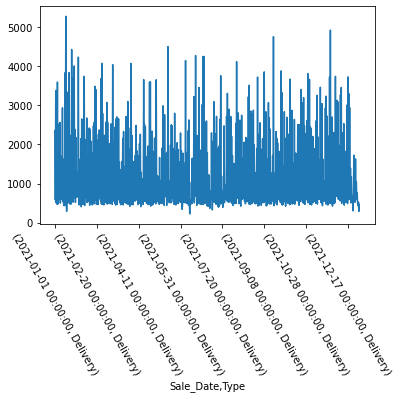

In [38]:
date_volume.plot()
plt.pyplot.xticks(rotation=300)
plt.pyplot.show()


In [37]:
DOS = df.set_index('Sale_Date')
DOS.index = pd.to_datetime(DOS.index)
print("No Sales on These dates")
k = pd.date_range(start='2021-12-31', end = '2022-03-31').difference(DOS.index);
pprint(k)

No Sales on These dates
DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-2

In [ ]:
# Date_of_purchase set as index
dataFrame = dataFrame.set_index('Date_of_purchase')

# using to_datetime() to convert string to DateTime object
dataFrame.index = pd.to_datetime(dataFrame.index)

# remaining dates displayed as output
print("\nDisplaying remaining dates from a range of dates...")
k = pd.date_range(start="2020-10-10", end="2020-10-22").difference(dataFrame.index);

In [97]:
def customer_df(df, customer_number):
    
    #customer_df = df[df['Store_ID'] == customer_number]
    customer_df = df[df['Store_ID'] == customer_number]
   
    return customer_df
        
     

In [110]:
customer_df(df, 1666)

,Order,Sale_Date,Type,Store_ID,Transaction_ID,SKU,Quantity,Sales_Amount,Inventory
0,133429,2/2/2021,Delivery,1666,866,1TS,230.0,37.38,156
34,3634,12/31/2021,Sale,1666,1750,OXH,1.0,10.23,0
74,14757,12/31/2021,Sale,1666,7081,X52,1.0,2.66,0
97,23625,12/31/2021,Sale,1666,11388,N5F,1.0,4.12,0
100,24998,12/31/2021,Sale,1666,12119,H15,1.0,4.88,0
...,...,...,...,...,...,...,...,...,...
133467,73360,1/1/2021,Sale,1666,40636,1EO,1.0,29.80,0
133490,80760,1/1/2021,Sale,1666,43899,OQA,1.0,12.87,0
133585,115647,1/1/2021,Sale,1666,59185,H15,1.0,8.52,0
133589,117313,1/1/2021,Sale,1666,35685,IEV,1.0,5.01,0
